In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
ls

SeqFISH Analysis.ipynb       mmc5.xlsx
SeqFISH Results.ipynb        mmc6.xlsx
exp_mat_43.csv               sample_info_43.csv
final_results_43.csv         spatial_SeqFISH_analysis.py


In [4]:
results = pd.read_csv('final_results_43.csv', index_col=0)
sample_info = pd.read_csv('sample_info_43.csv', index_col=0)

In [20]:
df = pd.read_csv('exp_mat_43.csv', index_col=0)
df.columns = df.columns.map(int)

dfm = np.log10(df + 1)

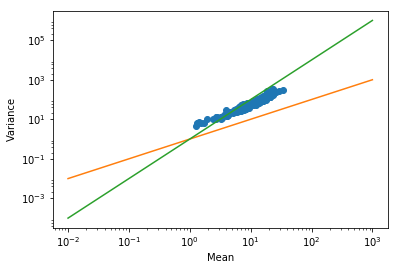

In [6]:
figsize(6, 4)
plt.loglog()
plt.scatter(df.mean(), df.var());
xy = [1e-2, 1e3]
plt.plot(xy, xy, c='C1');
plt.plot(xy, np.square(xy), c='C2');
plt.xlabel('Mean')
plt.ylabel('Variance');

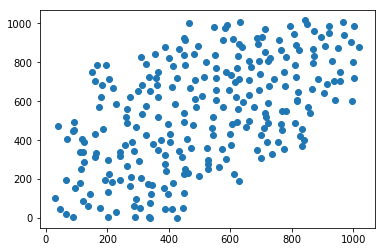

In [7]:
plt.scatter(sample_info.x, sample_info.y);

In [31]:
results['pval'] = results['pval'].clip_lower(results.query('pval > 0')['pval'].min() / 2)
results['qval'] = results['qval'].clip_lower(results.query('qval > 0')['qval'].min() / 2)

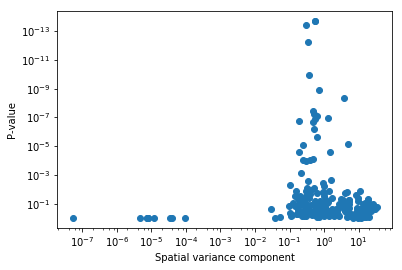

In [32]:
plt.loglog()
plt.scatter(results.max_s2_t_hat, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('Spatial variance component')
plt.ylabel('P-value');

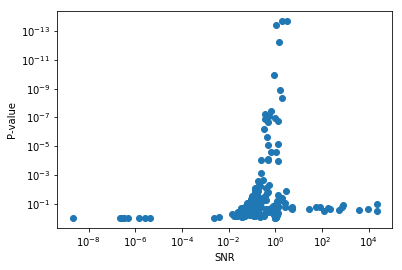

In [33]:
plt.loglog()
plt.scatter(1. / results.max_delta, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('SNR')
plt.ylabel('P-value');

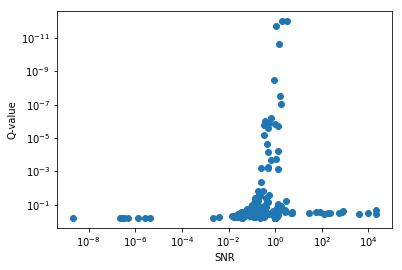

In [34]:
plt.loglog()
plt.scatter(1. / results.max_delta, results.qval);
plt.gca().invert_yaxis();
plt.xlabel('SNR')
plt.ylabel('Q-value');

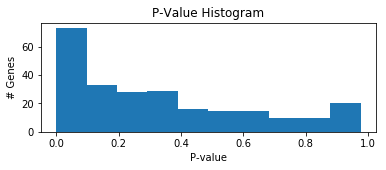

In [35]:
figsize(6, 2)
plt.hist(results.pval, bins=10);
plt.title('P-Value Histogram')
plt.ylabel('# Genes')
plt.xlabel('P-value');

In [36]:
results.query('qval < 0.05').shape

(32, 15)

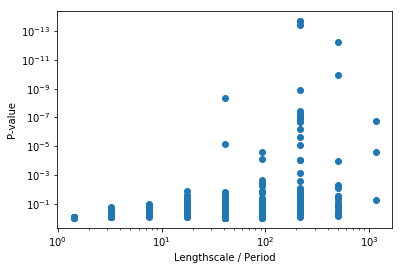

In [37]:
figsize(6, 4)
plt.loglog()
plt.scatter(results.l, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('Lengthscale / Period')
plt.ylabel('P-value');

In [38]:
N = 5
top_per_ls = results.query('qval < 0.05') \
                  .sort_values('qval', ascending=True) \
                  .groupby('l') \
                  .head(N) \
                  .sort_values(['l', 'qval'], ascending=[True, True])
                
top_per_ls

,g,max_delta,max_ll,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_null,LLR,pval,qval
119,'sst',0.541981,-271.670438,-3.640178,3.655643,257,0.000639,40.594851,4,SE,565.537180,-306.189529,34.519091,4.220910e-09,9.318893e-08
120,'gad1',0.763344,-133.013794,-4.537315,4.892951,257,0.000517,40.594851,4,SE,288.223893,-153.201739,20.187944,7.019392e-06,6.381266e-05
177,'mfge8',1.576211,-124.297398,-4.825784,1.515633,257,0.000519,93.963664,4,SE,270.791100,-141.936533,17.639135,2.670364e-05,2.063463e-04
175,'xdh',2.016174,-15.065476,-2.793217,0.491465,257,0.000665,93.963664,4,SE,52.327256,-30.670373,15.604897,7.805218e-05,5.744100e-04
178,'tiam1',3.247336,-25.387152,-5.350808,1.583053,257,0.000711,93.963664,4,SE,72.970609,-34.626862,9.239710,2.368224e-03,1.407686e-02
161,'Foxd3',4.914311,-234.893147,-4.229639,0.949824,257,0.000973,93.963664,4,SE,491.982598,-243.232514,8.339367,3.879510e-03,2.141288e-02
138,'Zfp422',4.333785,-263.232763,-4.264572,1.020769,257,0.000978,93.963664,4,SE,548.661831,-270.895579,7.662816,5.637046e-03,2.903933e-02
218,'myl14',0.325094,-48.042282,-3.927013,0.550495,257,0.000619,217.494828,4,SE,118.280869,-139.245264,91.202982,1.870726e-14,9.637072e-13
217,'mog',0.496153,-82.512924,-4.030392,0.534444,257,0.000664,217.494828,4,SE,187.222151,-189.593649,107.080726,1.870726e-14,9.637072e-13
219,'ndnf',0.952185,-85.892377,-3.031026,0.291036,257,0.000421,217.494828,4,SE,193.981058,-143.191140,57.298763,3.741452e-14,1.927414e-12


In [39]:
top_per_ls.shape

(19, 15)

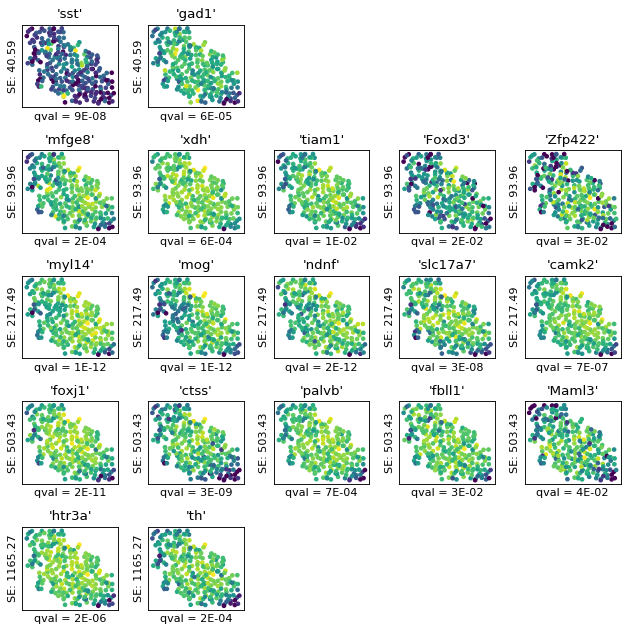

In [40]:
plt.figure(figsize=(8, 8), dpi=80)

N = 5
N_rows = top_per_ls['l'].unique().shape[0]
for j, T in enumerate(top_per_ls.groupby('l')):
    _, group = T
    for i, idx in enumerate(group.index):
        r = top_per_ls.loc[idx]
        plt.subplot(N_rows, N, j * N + i + 1)
        plt.scatter(sample_info.x, -sample_info.y, c=dfm.loc[r['g']], s=10);
        plt.title(r['g'])
        plt.xticks([])
        plt.yticks([])
        plt.xlabel('qval = {:.0E}'.format(r['qval']))
        if True:
            plt.ylabel('{}: {:.2f}'.format(r['model'], r['l']))

plt.tight_layout()

In [41]:
import NaiveDE
dfm = NaiveDE.stabilize(df.T).T
res = NaiveDE.regress_out(sample_info, dfm, 'np.log(total_count)').T

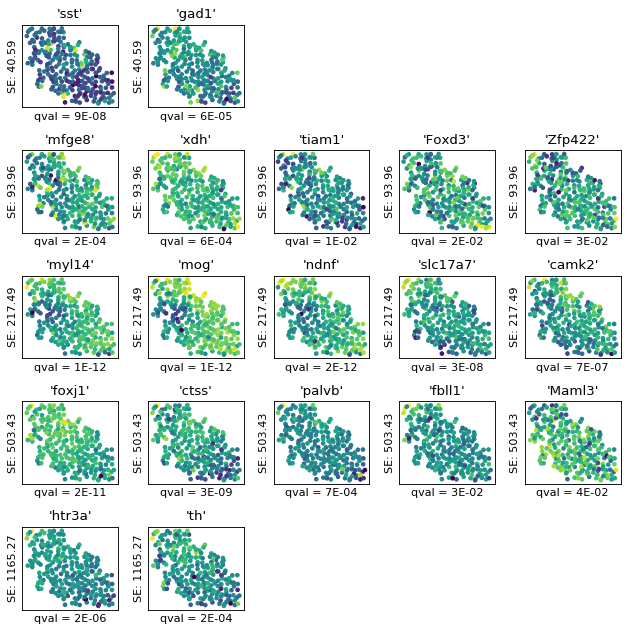

In [42]:
plt.figure(figsize=(8, 8), dpi=80)

N = 5
N_rows = top_per_ls['l'].unique().shape[0]
for j, T in enumerate(top_per_ls.groupby('l')):
    _, group = T
    for i, idx in enumerate(group.index):
        r = top_per_ls.loc[idx]
        plt.subplot(N_rows, N, j * N + i + 1)
        plt.scatter(sample_info.x, -sample_info.y, c=res[r['g']], s=10);
        plt.title(r['g'])
        plt.xticks([])
        plt.yticks([])
        plt.xlabel('qval = {:.0E}'.format(r['qval']))
        if True:
            plt.ylabel('{}: {:.2f}'.format(r['model'], r['l']))

plt.tight_layout()

In [44]:
', '.join(results.g)

"'Tal1', 'Prdm1', 'Foxa1', 'Gli1', 'Mitf', 'Gmeb2', 'Irx4', 'Uaca', 'Vezf1', 'Ctnnb1', 'Blzf1', 'Nr2e1', 'Ciita', 'Nhlh1', 'Tbx4', 'Arid2', 'Etv3', 'Nfkbiz', 'Rorc', 'Srebf1', 'Ikzf1', 'Plag1', 'E2f2', 'Ddx3x', 'Elk4', 'Tbr1', 'Irx5', 'Tfap2b', 'Gli2', 'Emx2', 'Tfdp2', 'Mybl1', 'Mybl2', 'Topors', 'Taf6l', 'Hoxd12', 'Pbx3', 'Sox5', 'Myb', 'Ppara', 'Gata4', 'Gata5', 'Tmf1', 'Rfx4', 'Sox17', 'Smyd1', 'Smad9', 'Gabpa', 'Creb1', 'Pou3f2', 'Tcf23', 'Barhl1', 'Rxra', 'Grhl1', 'Vav1', 'Nfia', 'Hltf', 'Rbpj', 'Lhx1', 'Lhx6', 'Nfe2l3', 'Nfe2l2', 'Bhlhe41', 'Pgr', 'Hoxa1', 'Egf', 'Pax9', 'Foxd4', 'Mtf2', 'Npas3', 'Foxo4', 'Sall1', 'Zbtb33', 'Lhx5', 'Tfap2e', 'Gli3', 'Foxn4', 'Mnat1', 'Dlx2', 'Paxip1', 'Rybp', 'Zfp287', 'Zfp128', 'Ppargc1b', 'Vsx2', 'Rnf2', 'Hoxd13', 'Sox9', 'Cdc5l', 'Cebpg', 'Scml2', 'Cdc6', 'Arid3a', 'Hic1', 'Six4', 'Hoxb3', 'Lpp', 'Tbx2', 'En1', 'En2', 'Hnf1a', 'Elf4', 'Wt1', 'Trps1', 'Bach2', 'Sin3a', 'Smad5', 'Nkx3-1', 'Rbak', 'Zscan21', 'Nr5a1', 'Esrrb', 'Pax1', 'Taf2', 'Lmx

In [45]:
from adjustText import adjust_text

19


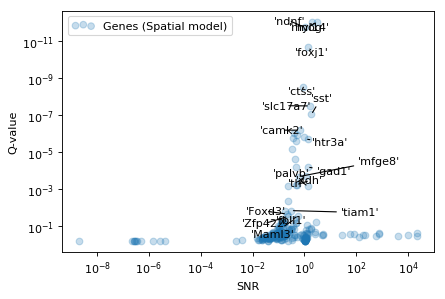

In [50]:
plt.figure(figsize=(6, 4), dpi=80)

plt.xscale('log')
plt.yscale('log')

tmp = results.query('model == "SE"')
plt.scatter(1./tmp['max_delta'], tmp['qval'],
            alpha=0.25, rasterized=True, label='Genes (Spatial model)', marker='o', color='C0');

texts = []
for i in top_per_ls.index:
    texts.append(plt.text(1./results.loc[i, 'max_delta'], results.loc[i, 'qval'], results.loc[i, 'g']))
    

print(adjust_text(texts, arrowprops=dict(arrowstyle='-'),
                         force_points=0.4,
                         force_text=0.3,
                         force_objects=0.1,
                         zorder=20,
                         x=results['max_s2_t_hat'],
                         y=results['qval']))

plt.xlabel('SNR');
plt.ylabel('Q-value');
plt.gca().invert_yaxis()

plt.legend(scatterpoints=3, loc='upper left');

In [53]:
results.sort_values('qval').head(20)

,g,max_delta,max_ll,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_null,LLR,pval,qval
217,'mog',0.496153,-82.512924,-4.030392,0.534444,257,0.000664,217.494828,4,SE,187.222151,-189.593649,107.080726,1.870726e-14,9.637072e-13
218,'myl14',0.325094,-48.042282,-3.927013,0.550495,257,0.000619,217.494828,4,SE,118.280869,-139.245264,91.202982,1.870726e-14,9.637072e-13
219,'ndnf',0.952185,-85.892377,-3.031026,0.291036,257,0.000421,217.494828,4,SE,193.981058,-143.191140,57.298763,3.741452e-14,1.927414e-12
243,'foxj1',0.706521,-23.878131,-5.199981,0.338561,257,0.000525,503.428645,4,SE,69.952567,-75.728366,51.850234,5.989653e-13,2.314184e-11
242,'ctss',1.106990,-121.201868,-5.223999,0.364240,257,0.000444,503.428645,4,SE,264.600040,-162.944060,41.742191,1.041374e-10,3.218791e-09
215,'slc17a7',0.639652,-132.102383,-4.843513,0.710345,257,0.000518,217.494828,4,SE,286.401071,-168.968629,36.866246,1.265174e-09,3.258783e-08
119,'sst',0.541981,-271.670438,-3.640178,3.655643,257,0.000639,40.594851,4,SE,565.537180,-306.189529,34.519091,4.220910e-09,9.318893e-08
223,'camk2',1.544514,-19.314364,-4.720393,0.475697,257,0.000523,217.494828,4,SE,60.825033,-49.777344,30.462980,3.402988e-08,6.573955e-07
213,'opalin',2.641142,-111.518875,-5.021930,0.514423,257,0.000521,217.494828,4,SE,245.234053,-141.066098,29.547223,5.457078e-08,9.370740e-07
210,'slc5a7',1.875613,-30.497626,-5.522920,0.621555,257,0.000530,217.494828,4,SE,83.191556,-59.248463,28.750837,8.231432e-08,1.272130e-06


In [57]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale

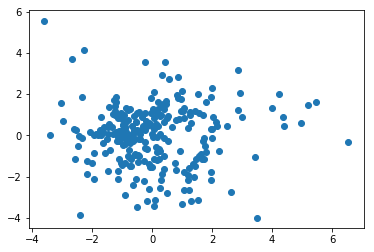

In [90]:
pca = PCA(2)
Y = pca.fit_transform(res)
plt.scatter(*Y.T);

In [77]:
Y.shape

(257, 2)

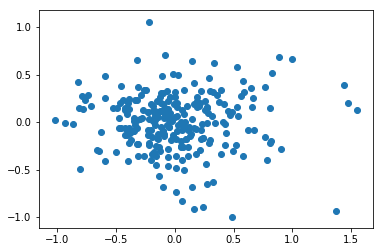

In [78]:
tmp = res[results.sort_values('qval').head(3).index]
Y = pca.fit_transform(tmp)
plt.scatter(*Y.T);